<a href="https://colab.research.google.com/github/zendhiyb/Sentimen-Publik-Kasus-BEM-FISIP-UNAIR-Metode-Logistic-Regression-dan-Decision-Tree/blob/main/klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Tugas/MACHINE LEARNING/komentar_youtube_label.csv')
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positif' if x == 1 else 'negatif')
sorted_data = data.sort_values(by='date', ascending=True)
output_df = sorted_data.head(10)
output_df

,comment,channel_name,date,like_count,dislike_count,sentiment,sentiment_label
516,Bila perlu bubarinbem indonesia .ngapain bisa...,@dady0817,2024-10-28 05:46:30+00:00,4,0,1.0,positif
515,Setuju banget agar mahasiswa dapat belajar ada...,@RudyHartono99,2024-10-28 05:46:32+00:00,23,0,1.0,positif
514,Menyala BEM FISIP Unair! 🔥,@robbycandra4298,2024-10-28 05:52:38+00:00,2,0,1.0,positif
513,Jgn di cabut pa presiden Prabowo enak aja ...l...,@angeliaangelia-mj5eb,2024-10-28 05:52:49+00:00,11,0,0.0,negatif
512,"Sy CENDRUNG DIPANGGIL MABES POLRI, kebebasan ...",@imgatera4345,2024-10-28 05:53:45+00:00,1,0,0.0,negatif
511,"Bekukan saja bem fisip, uang kegiatan untuk be...",@liyanaalessa5299,2024-10-28 05:55:26+00:00,3,0,0.0,negatif
510,Pemerintah skrg hrs siap dikritik ..jgn haus p...,@yenimulyani8362,2024-10-28 05:59:23+00:00,2,0,1.0,positif
509,"setuju banget ,",@jokosriyanto405,2024-10-28 06:11:25+00:00,1,0,1.0,positif
508,"Pilihan rakyat,koq komplen 😂",@wellychandra5233,2024-10-28 06:14:58+00:00,1,0,0.0,negatif
507,Mereka lupa presiden sekarang bukan yg kalem k...,@genta479,2024-10-28 06:15:16+00:00,4,0,0.0,negatif


In [ ]:
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts_df = pd.DataFrame(sentiment_counts).reset_index()
sentiment_counts_df.columns = ['Sentimen', 'Jumlah Komentar']
sentiment_counts_df['Sentimen'] = sentiment_counts_df['Sentimen'].replace({0.0: 'Negatif', 1.0: 'Positif'})

total_comments = len(data)
total_df = pd.DataFrame([['Total', total_comments]], columns=['Sentimen', 'Jumlah Komentar'])

result_df = pd.concat([sentiment_counts_df, total_df], ignore_index=True)

result_df

,Sentimen,Jumlah Komentar
0,Negatif,998
1,Positif,180
2,Total,1179


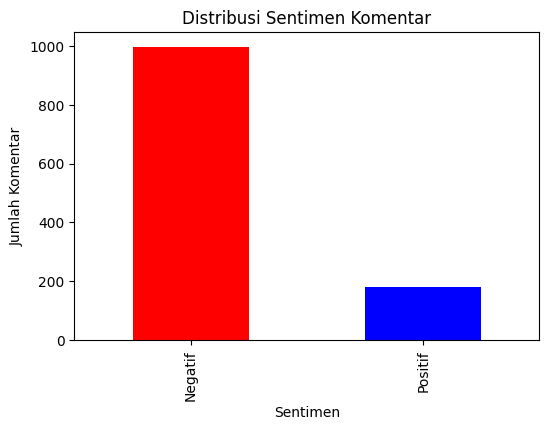

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.index = sentiment_counts.index.map({0.0: 'Negatif', 1.0: 'Positif'})
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Komentar')
plt.title('Distribusi Sentimen Komentar')

plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Tugas/MACHINE LEARNING/komentar_youtube_preprocessing.csv')
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positif' if x == 1 else 'negatif')
sorted_data = data.sort_values(by='date', ascending=True)
output_df = sorted_data.head(10)
output_df

,comment,channel_name,date,like_count,dislike_count,sentiment,cleaned_comment,case_folded_comment,comment_without_stopwords,slang_replaced_comment,stemmed_comment,tokens_final,text_string,sentiment_label
515,Bila perlu bubarinbem indonesia .ngapain bisa...,@dady0817,2024-10-28 05:46:30+00:00,4,0,1.0,Bila perlu bubarinbem indonesia ngapain bisa...,bila perlu bubarinbem indonesia ngapain bisa...,bubarinbem indonesia ngapain nya demo bikin ja...,bubarinbem indonesia sedang apa nya demo bikin...,bubarinbem indonesia sedang apa nya demo bikin...,"['bubarinbem', 'indonesia', 'sedang', 'apa', '...",bubarinbem indonesia sedang demo bikin jalan m...,positif
514,Setuju banget agar mahasiswa dapat belajar ada...,@RudyHartono99,2024-10-28 05:46:32+00:00,23,0,1.0,Setuju banget agar mahasiswa dapat belajar ada...,setuju banget agar mahasiswa dapat belajar ada...,setuju banget mahasiswa belajar adab etika ber...,setuju banget mahasiswa belajar adab etika ber...,tuju banget mahasiswa ajar adab etika negara,"['tuju', 'banget', 'mahasiswa', 'ajar', 'adab'...",tuju banget mahasiswa ajar adab etika negara,positif
513,Menyala BEM FISIP Unair! 🔥,@robbycandra4298,2024-10-28 05:52:38+00:00,2,0,1.0,Menyala BEM FISIP Unair,menyala bem fisip unair,menyala bem fisip unair,menyala bem fisip unair,nyala bem fisip unair,"['nyala', 'bem', 'fisip', 'unair']",nyala fisip unair,positif
512,Jgn di cabut pa presiden Prabowo enak aja ...l...,@angeliaangelia-mj5eb,2024-10-28 05:52:49+00:00,11,0,0.0,Jgn di cabut pa presiden Prabowo enak aja l...,jgn di cabut pa presiden prabowo enak aja l...,jgn cabut pa presiden prabowo enak aja bekukan...,jangan pergi pa presiden prabowo enak saja bek...,jangan pergi pa presiden prabowo enak saja bek...,"['jangan', 'pergi', 'pa', 'presiden', 'prabowo...",jangan pergi presiden prabowo enak saja beku k...,negatif
511,"Sy CENDRUNG DIPANGGIL MABES POLRI, kebebasan ...",@imgatera4345,2024-10-28 05:53:45+00:00,1,0,0.0,Sy CENDRUNG DIPANGGIL MABES POLRI kebebasan ...,sy cendrung dipanggil mabes polri kebebasan ...,sy cendrung dipanggil mabes polri kebebasan,saya cendrung dipanggil markas besar polri keb...,saya cendrung panggil markas besar polri bebas,"['saya', 'cendrung', 'panggil', 'markas', 'bes...",saya cendrung panggil markas besar polri bebas,negatif
510,"Bekukan saja bem fisip, uang kegiatan untuk be...",@liyanaalessa5299,2024-10-28 05:55:26+00:00,3,0,0.0,Bekukan saja bem fisip uang kegiatan untuk be...,bekukan saja bem fisip uang kegiatan untuk be...,bekukan bem fisip uang kegiatan bem aja butuh ...,bekukan bem fisip uang kegiatan bem saja butuh...,beku bem fisip uang giat bem saja butuh uang k...,"['beku', 'bem', 'fisip', 'uang', 'giat', 'bem'...",beku fisip uang giat saja butuh uang kampus,negatif
509,Pemerintah skrg hrs siap dikritik ..jgn haus p...,@yenimulyani8362,2024-10-28 05:59:23+00:00,2,0,1.0,Pemerintah skrg hrs siap dikritik jgn haus p...,pemerintah skrg hrs siap dikritik jgn haus p...,pemerintah skrg hrs dikritik jgn haus puja puj...,pemerintah skrg harus dikritik jangan haus puj...,perintah skrg harus kritik jangan haus puja pu...,"['perintah', 'skrg', 'harus', 'kritik', 'janga...",perintah skrg harus kritik jangan haus puja pu...,positif
508,"setuju banget ,",@jokosriyanto405,2024-10-28 06:11:25+00:00,1,0,1.0,setuju banget,setuju banget,setuju banget,setuju banget,tuju banget,"['tuju', 'banget']",tuju banget,positif
507,"Pilihan rakyat,koq komplen 😂",@wellychandra5233,2024-10-28 06:14:58+00:00,1,0,0.0,Pilihan rakyat koq komplen,pilihan rakyat koq komplen,pilihan rakyat koq komplen,pilihan rakyat kok komplen,pilih rakyat kok komplen,"['pilih', 'rakyat', 'kok', 'komplen']",pilih rakyat komplen,negatif
506,Mereka lupa presiden sekarang bukan yg kalem k...,@genta479,2024-10-28 06:15:16+00:00,4,0,0.0,Mereka lupa presiden sekarang bukan yg kalem k...,mereka lupa presiden sekarang bukan yg kalem k...,lupa presiden yg kalem hina,lupa presiden yang kalem hina,lupa presiden yang kalem hina,"['lupa', 'presiden', 'yang', 'kalem

In [ ]:
data['text_string'] = data['text_string'].astype('str')
data['text_string'] = data['text_string'].astype(pd.StringDtype())
data.dtypes

,0
comment,object
channel_name,object
date,"datetime64[ns, UTC]"
like_count,int64
dislike_count,int64
sentiment,float64
cleaned_comment,object
case_folded_comment,object
comment_without_stopwords,object
slang_replaced_comment,object


In [ ]:
!pip install wordcloud

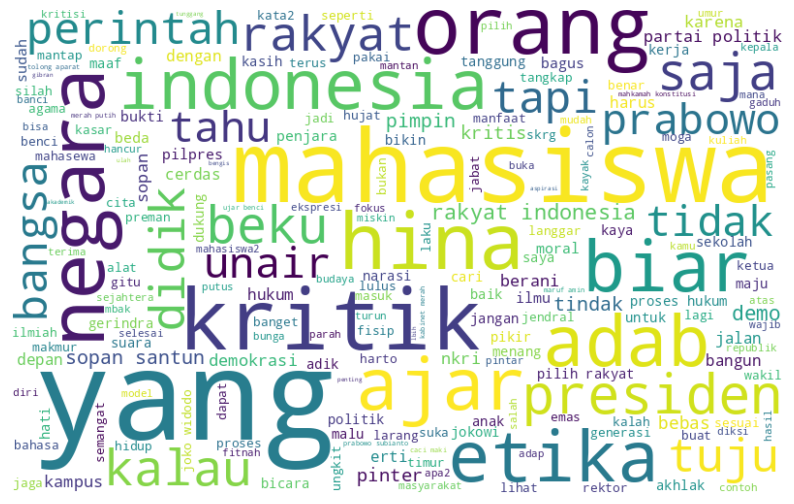

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# file CSV
data = pd.read_csv('/content/drive/MyDrive/Tugas/MACHINE LEARNING/komentar_youtube_preprocessing.csv')

def clean_comment(comment):
    return comment.replace('.', '').replace(',', '')

data['text_string'] = data['text_string'].astype(str).apply(clean_comment)
data['text_string'] = data['text_string'].astype(str)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positif' if x == 1 else 'negatif')
df_p = data[data['sentiment_label'] == "positif"]
all_words_pos = ' '.join(df_p['text_string'])

if all_words_pos.strip() == '':
    print("Tidak ada kata yang ditemukan untuk sentimen positif.")
else:
    wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_pos)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


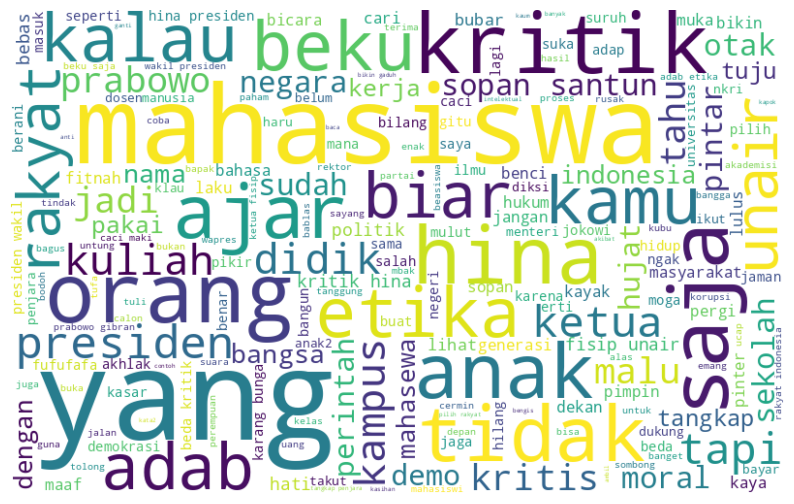

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# file CSV
data = pd.read_csv('/content/drive/MyDrive/Tugas/MACHINE LEARNING/komentar_youtube_preprocessing.csv')

def clean_comment(comment):
    return comment.replace('.', '').replace(',', '')

data['text_string'] = data['text_string'].astype(str).apply(clean_comment)
data['text_string'] = data['text_string'].astype(str)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positif' if x == 1 else 'negatif')
df_p = data[data['sentiment_label'] == "negatif"]
all_words_pos = ' '.join(df_p['text_string'])

if all_words_pos.strip() == '':
    print("Tidak ada kata yang ditemukan untuk sentimen positif.")
else:
    wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_pos)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [ ]:
!pip install scikit-learn==1.1.2 imbalanced-learn==0.8.1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
X = data['text_string']
y = data['sentiment_label']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_train_sizes = [90, 80, 70, 60, 50, 40, 30, 20, 10]
data_test_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90]

classification_reports = {
    'decision_tree': [],
    'logistic_regression': []
}

accuracies = []

for train_size, test_size in zip(data_train_sizes, data_test_sizes):
    X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(
        x_sm, y_sm, test_size=test_size/(train_size+test_size), random_state=3
    )

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_partial, y_train_partial)
    dt_pred = dt.predict(X_test_partial)
    dt_accuracy = accuracy_score(y_test_partial, dt_pred)

    lr = LogisticRegression(max_iter=200, random_state=42)
    lr.fit(X_train_partial, y_train_partial)
    lr_pred = lr.predict(X_test_partial)
    lr_accuracy = accuracy_score(y_test_partial, lr_pred)

    classification_reports['decision_tree'].append(classification_report(y_test_partial, dt_pred, output_dict=True))
    classification_reports['logistic_regression'].append(classification_report(y_test_partial, lr_pred, output_dict=True))

    accuracies.append((dt_accuracy, lr_accuracy))

df_classification_reports = []

for i in range(len(data_train_sizes)):
    dt_report = classification_reports['decision_tree'][i]['weighted avg']
    lr_report = classification_reports['logistic_regression'][i]['weighted avg']
    dt_accuracy, lr_accuracy = accuracies[i]

    metrics = {
        'Train Size': data_train_sizes[i],
        'Test Size': data_test_sizes[i],
        '(DT) Accuracy': dt_accuracy,
        '(DT) Precision': dt_report['precision'],
        '(DT) Recall': dt_report['recall'],
        '(DT) F1-Score': dt_report['f1-score'],
        '(DT) Support': dt_report['support'],
        '(LR) Accuracy': lr_accuracy,
        '(LR) Precision': lr_report['precision'],
        '(LR) Recall': lr_report['recall'],
        '(LR) F1-Score': lr_report['f1-score'],
        '(LR) Support': lr_report['support'],
    }
    df_classification_reports.append(metrics)

df_classification_reports = pd.DataFrame(df_classification_reports)

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

styled_df = df_classification_reports.style.apply(highlight_max, subset=['(DT) Accuracy', '(LR) Accuracy'])

styled_df


,Train Size,Test Size,(DT) Accuracy,(DT) Precision,(DT) Recall,(DT) F1-Score,(DT) Support,(LR) Accuracy,(LR) Precision,(LR) Recall,(LR) F1-Score,(LR) Support
0,90,10,0.910000,0.910551,0.910000,0.909910,200,0.885000,0.885004,0.885000,0.884980,200
1,80,20,0.850000,0.850202,0.850000,0.849758,400,0.875000,0.875563,0.875000,0.875085,400
2,70,30,0.863105,0.863212,0.863105,0.863004,599,0.861436,0.861414,0.861436,0.861403,599
3,60,40,0.811014,0.811690,0.811014,0.810790,799,0.858573,0.858613,0.858573,0.858581,799
4,50,50,0.830661,0.830659,0.830661,0.830653,998,0.849699,0.849823,0.849699,0.849707,998
5,40,60,0.801336,0.803018,0.801336,0.801092,1198,0.826377,0.827018,0.826377,0.826308,1198
6,30,70,0.793991,0.795347,0.793991,0.793807,1398,0.800429,0.800682,0.800429,0.800408,1398
7,20,80,0.783344,0.787628,0.783344,0.782500,1597,0.800250,0.800845,0.800250,0.800163,1597
8,10,90,0.725097,0.725206,0.725097,0.725062,1797,0.750139,0.750226,0.750139,0.750115,1797


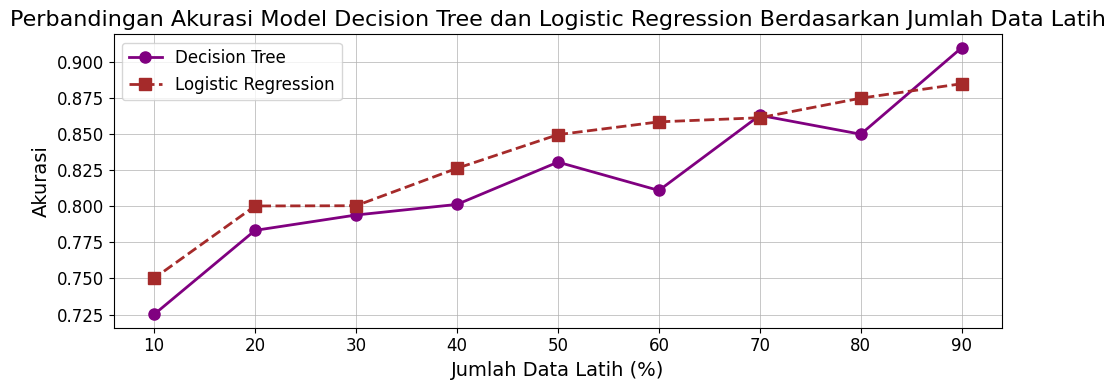

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

colors = {
    'decision_tree': 'purple',
    'logistic_regression': 'brown',
}

plt.plot(df_classification_reports['Train Size'], df_classification_reports['(DT) Accuracy'], marker='o', color=colors['decision_tree'], linestyle='-', linewidth=2, markersize=8, label='Decision Tree')

plt.plot(df_classification_reports['Train Size'], df_classification_reports['(LR) Accuracy'], marker='s', color=colors['logistic_regression'], linestyle='--', linewidth=2, markersize=8, label='Logistic Regression')

plt.xlabel('Jumlah Data Latih (%)', fontsize=14)
plt.ylabel('Akurasi', fontsize=14)
plt.title('Perbandingan Akurasi Model Decision Tree dan Logistic Regression Berdasarkan Jumlah Data Latih', fontsize=16)
plt.xticks(data_train_sizes, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(True, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


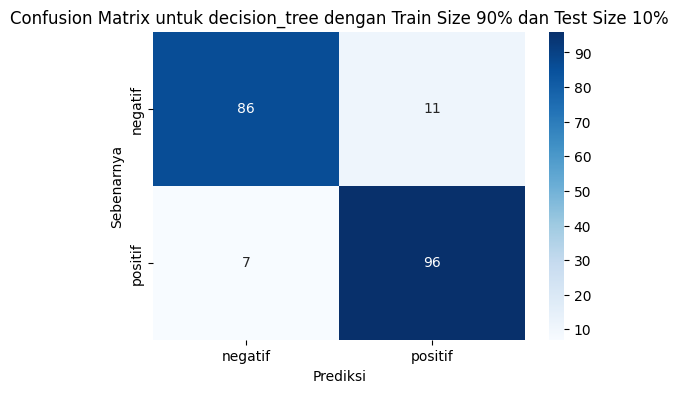

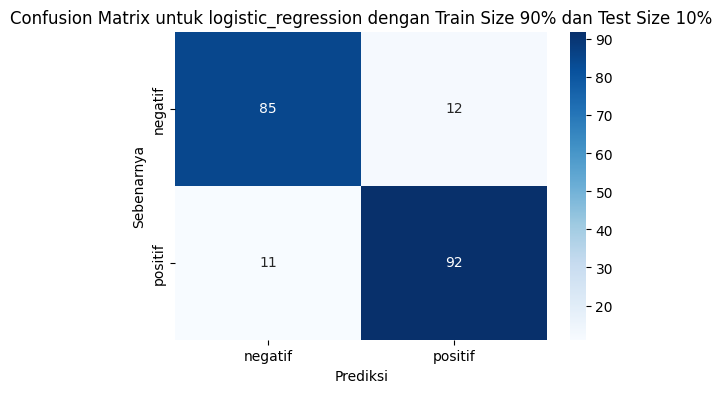

In [ ]:
class_labels = ['negatif', 'positif']
highest_accuracy_indices = {
    'decision_tree': np.argmax([accuracy[0] for accuracy in accuracies]),
    'logistic_regression': np.argmax([accuracy[1] for accuracy in accuracies]),
}

for model, idx in highest_accuracy_indices.items():
    cm = confusion_matrices[model][idx]
    data_train_size = df_classification_reports.loc[idx, 'Train Size']
    data_test_size = df_classification_reports.loc[idx, 'Test Size']

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix untuk {model} dengan Train Size {data_train_size}% dan Test Size {data_test_size}%')
    plt.xlabel('Prediksi')
    plt.ylabel('Sebenarnya')